In [1]:
import numpy as np
import cv2
import os
import fnmatch
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score,recall_score,f1_score

# Load the testing samples 

In [2]:
target_img = (224,224)
input_img = (224,224,3)
batch = 32

train_datagen = ImageDataGenerator(rescale=1./255)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'Selected Features/Train_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')
validation_generator = valid_datagen.flow_from_directory(
        'Selected Features/Test_224x224/',
        target_size = target_img,
        batch_size = batch,
        class_mode = 'binary')

Found 1498 images belonging to 2 classes.
Found 703 images belonging to 2 classes.


In [3]:
directory = './Selected Features/Test_224x224/'

test_images = []

for subdir, _, files in os.walk(directory):
    for file in files:
        if fnmatch.fnmatch(file, '*.png'):
            test_images.append(os.path.join(subdir, file))

test_labels = [os.path.basename(os.path.dirname(image_path)) for image_path in test_images]

print(test_labels[0], test_images[0])

1 ./Selected Features/Test_224x224/1/357.png


In [4]:
y_test = np.array(test_labels).astype(int)
print(y_test.shape)

(703,)


In [5]:
#Test Images 
length = len(test_images)
batch_size = length 

images = np.empty((batch_size, 224, 224, 3), dtype=np.float32)

for i in range(length):
    test = cv2.imread(test_images[i])
    test = cv2.cvtColor(test, cv2.COLOR_BGR2RGB)
    img = np.array(test) / 255.0
    
    images[i] = img

# Evaluation of three different variants of VGG16

In [6]:
model1 =load_model('VGG16_tpe_selected_features.h5')
model2 =load_model('VGG16_simulated_selected_features.h5')
model3 = load_model('VGG16_random_selected_features.h5')

In [7]:
prediction1 = (model1.predict(images) > 0.5).astype(int).flatten()
prediction2 = (model2.predict(images) > 0.5).astype(int).flatten()
prediction3 = (model3.predict(images) > 0.5).astype(int).flatten()

In [8]:
accuracy1 = accuracy_score(y_test, prediction1)
precision1 =precision_score(y_test, prediction1, average='macro')
recall = recall_score(y_test, prediction1, average='macro')
f1 = f1_score(y_test, prediction1, average='macro')

output = (
    "Evaluation Metrics of VGG16_TPE:\n"
    f"Testing Accuracy: {accuracy1 * 100}\n"
    f"Precision: {precision1}\n"
    f"Recall: {recall}\n"
    f"F1-Score: {f1}"
)

print(output)

Evaluation Metrics of VGG16_TPE:
Testing Accuracy: 99.14651493598862
Precision: 0.9916738984493967
Recall: 0.991086906747784
F1-Score: 0.991372115856652


Classification Report of VGG16_TPE:

               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99       316
      Attack       0.99      0.99      0.99       387

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703



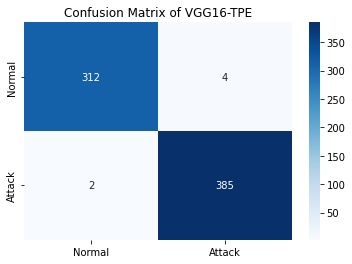

In [13]:
target_names = ['Normal', 'Attack']
print("Classification Report of VGG16_TPE:\n\n", classification_report(y_test, prediction1, target_names=target_names))

conf_mat1 = confusion_matrix(y_test, prediction1)
sns.heatmap(conf_mat1, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16-TPE')
plt.show()

In [14]:
accuracy2 = accuracy_score(y_test, prediction2)
precision2 =precision_score(y_test, prediction2, average='macro')
recall2 = recall_score(y_test, prediction2, average='macro')
f12 = f1_score(y_test, prediction2, average='macro')

output2 = (
    "Evaluation Metrics of VGG16_Simulated_Annealing:\n"
    f"Testing Accuracy: {accuracy2 * 100}\n"
    f"Precision: {precision2}\n"
    f"Recall: {recall2}\n"
    f"F1-Score: {f12}"
)

print(output2)

Evaluation Metrics of VGG16_Simulated_Annealing:
Testing Accuracy: 98.71977240398293
Precision: 0.9878559944878272
Recall: 0.986340071304746
F1-Score: 0.9870463297934415


Classification Report of VGG16_Simuated_Annealing:

               precision    recall  f1-score   support

      Normal       0.99      0.98      0.99       316
      Attack       0.98      0.99      0.99       387

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703



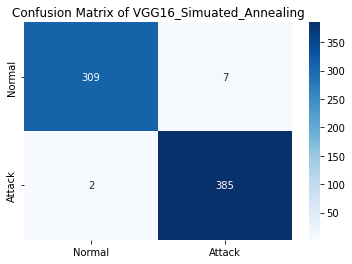

In [15]:
print("Classification Report of VGG16_Simuated_Annealing:\n\n", classification_report(y_test, prediction2, target_names=target_names))

conf_mat2 = confusion_matrix(y_test, prediction2)
sns.heatmap(conf_mat2, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16_Simuated_Annealing')
plt.show()

In [16]:
accuracy3 = accuracy_score(y_test, prediction3)
precision3 =precision_score(y_test, prediction3, average='macro')
recall3 = recall_score(y_test, prediction3, average='macro')
f1_3 = f1_score(y_test, prediction3, average='macro')

output3 = (
    "Evaluation Metrics of VGG16_Random_Search:\n"
    f"Testing Accuracy: {accuracy3 * 100}\n"
    f"Precision: {precision3}\n"
    f"Recall: {recall3}\n"
    f"F1-Score: {f1_3}"
)

print(output3)

Evaluation Metrics of VGG16_Random_Search:
Testing Accuracy: 99.43100995732574
Precision: 0.9942514637098092
Recall: 0.9942514637098092
F1-Score: 0.9942514637098092


Classification Report of VGG16_Random_Search:

               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99       316
      Attack       0.99      0.99      0.99       387

    accuracy                           0.99       703
   macro avg       0.99      0.99      0.99       703
weighted avg       0.99      0.99      0.99       703



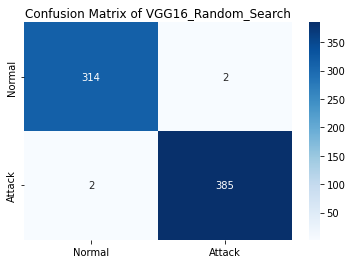

In [17]:
print("Classification Report of VGG16_Random_Search:\n\n", classification_report(y_test, prediction3, target_names=target_names))

conf_mat3 = confusion_matrix(y_test, prediction3)
sns.heatmap(conf_mat3, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of VGG16_Random_Search')
plt.show()

# Misclassification based Weighted Ensemble Learning

In [18]:
models = [model1, model2, model3]

predictions = [model.predict(images) for model in models]

In [19]:
predictions = np.array(predictions)
predictions.shape

(3, 703, 1)

In [20]:
misclassified1 = np.sum(y_test != prediction1)
misclassified2 = np.sum(y_test != prediction2)
misclassified3 = np.sum(y_test != prediction3)
print(f"Misclassified samples by VGG16_TPE: {misclassified1}\nMisclassified samples by VGG16_Simulated Annealing: {misclassified2}\nMisclassified samples by VGG16_Random_Search: {misclassified3}")

Misclassified samples by VGG16_TPE: 6
Misclassified samples by VGG16_Simulated Annealing: 9
Misclassified samples by VGG16_Random_Search: 4


In [21]:
w1 = 1/(misclassified1 + 0.001)
w2 = 1/(misclassified2 + 0.001)
w3 = 1/(misclassified3 + 0.001)

sum_weights = w1 + w2 + w3

normalized_w1 = w1 / sum_weights
normalized_w2 = w2 / sum_weights
normalized_w3 = w3 / sum_weights

print(f"Weight for VGG16_TPE: {normalized_w1}\nWeight for VGG16_Simulated Annealing: {normalized_w2}\nWeight for VGG16_Random_Search: {normalized_w3}")


Weight for VGG16_TPE: 0.3157982431523288
Weight for VGG16_Simulated Annealing: 0.21054385703334355
Weight for VGG16_Random_Search: 0.47365789981432765


In [22]:
weights = [normalized_w1, normalized_w2, normalized_w3]
weighted_prediction = np.tensordot(predictions, weights, axes=((0),(0)))
weighted_ensemble_prediction = (weighted_prediction > 0.5).astype(int).flatten()

weighted_accuracy = accuracy_score(y_test, weighted_ensemble_prediction)
ensemble_precision =precision_score(y_test, weighted_ensemble_prediction, average='macro')
ensemble_recall = recall_score(y_test, weighted_ensemble_prediction, average='macro')
ensemble_f1 = f1_score(y_test, weighted_ensemble_prediction, average='macro')

ensemble_output = (
    "Evaluation Metrics of Ensemble Learning with Optimized Weight:\n"
    f"Testing Accuracy: {weighted_accuracy * 100}\n"
    f"Precision: {ensemble_precision}\n"
    f"Recall: {ensemble_recall}\n"
    f"F1-Score: {ensemble_f1}"
)

print(ensemble_output)

Evaluation Metrics of Ensemble Learning with Optimized Weight:
Testing Accuracy: 99.71550497866288
Precision: 0.9974293059125964
Recall: 0.9968354430379747
F1-Score: 0.997124038618884


Classification Report of Misclassified Based Weighted Ensemble:

               precision    recall  f1-score   support

      Normal       1.00      0.99      1.00       316
      Attack       0.99      1.00      1.00       387

    accuracy                           1.00       703
   macro avg       1.00      1.00      1.00       703
weighted avg       1.00      1.00      1.00       703



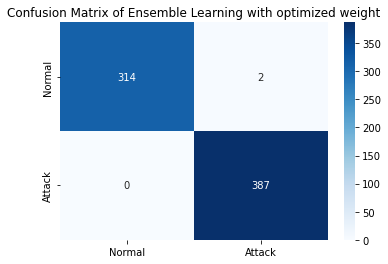

In [23]:
print("Classification Report of Misclassified Based Weighted Ensemble:\n\n", classification_report(y_test, weighted_ensemble_prediction, target_names=target_names))

conf_mat4 = confusion_matrix(y_test, weighted_ensemble_prediction)
sns.heatmap(conf_mat4, annot=True, fmt = 'd', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix of Ensemble Learning with optimized weight')
plt.show()